# Redes Neuronales 2021
## Práctico 1

Alumno: Juan Manuel López
Identidicación: 39.764.711

In [19]:
#Imports

import numpy as np
import matplotlib.pyplot as plt

# Herramientas:

def rk4(f,x,t,dt,p):

    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

def integrador_ode(m,f,x0,a,b,k,p):
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

### Primera Parte
Trabajaremos con la ecuación diferencial del potencial de membrana en ausencia de mecanismo de disparo:

$$   \frac{d V_{m}(t)}{d t} = \frac{1}{ \tau_{m}} (E_{L} - V_{m}(t) + R_{m} I_{e}(t)) $$

Donde los parámetros son:

$ \tau_{m} = 10 ms $

$ E_{L} = -65mV $

$ R_{m} = 10M\Omega $

Notar que si las unidades de la corriente $I_{e}(t)$ se brindan en $nA$ (nanoamperes) todos los valores se pueden trabajar sin unidades, si se usa el tiempo de integración en milisegundos como $\tau_{m}$.

**Puntos Fijos:**

Si buscamos los puntos fijos de la ecuación, donde $ \frac{d V_{m}(t)}{d t} = 0 $, vemos que existe un único valor en $ V^{\ast}_{m} = E_{L} + R_{m} I_{e}$.

**Estabilidad:** 

Si pensamos a la ecuación como $ \frac{d V}{d t} = f(V) $ (se retiraron los paréntesis de dependencia temporal para facilitar la visualización), y obtenemos $ \frac{d f}{d V} $ esta resulta en:

$$ \frac{d f}{d V} =  -\frac{1}{ \tau_{m}} $$

(si suponemos que $I_{e}(t)$ y $V_{m}(t)$ son variables independientes entre sí)

Esta derivada es negativa para todos los casos donde $\tau_{m}$ sea positivo, lo cual sucede en toda situación normal ya que $\tau_{m}$ representa una duración en tiempo. Por lo tanto, siempre bajo estas consideraciones, $ V^{\ast}_{m} = E_{L} + R_{m} I_{e}$ es siempre punto fijo estable.

In [20]:
def first_ode(v, t, params):
    """
    params in order:
    -Tau
    -EL
    -Rm
    -Ie
    """
    return (1/params[0]) * (params[1] - v + params[2]*params[3])

A) Considerando $I_{e}(t) = 0$ constante. Si retomamos la expresión del punto fijo de esta ecuación, para $I_{e}(t) = 0$ este resulta $ V^{\ast}_{m} = -65 mV $. Como mencionamos antes, este es estable. Para verificarlo se realiza un análisis de valor inicial. Para los valores iniciales de Potencial de Membrana (llamado aquí V0) se utilizarán valores de 0 a 95 mV separados por 15 mV. Además se integrará en 20 puntos de tiempo entre 0 y 60 ms (6 veces el tiempo carácterístico de la membrana).

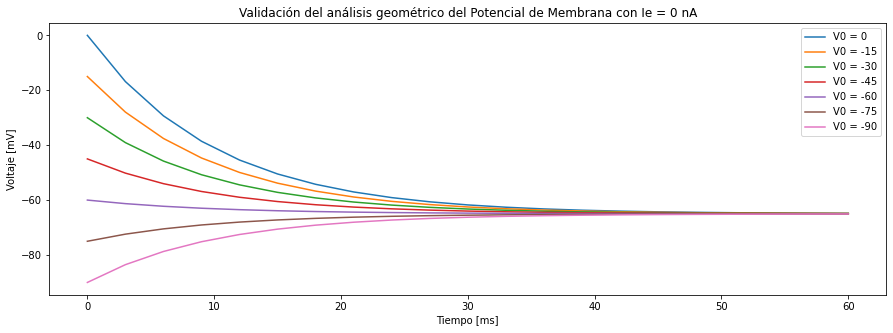

In [21]:
v0 = np.arange(0,-100,-15)
T = 10
E = -65
R = 10
I = 0

t_int1, v_int1 = integrador_ode(rk4, first_ode, v0, 0, 60, 20, (T, E, R, I))

#print(t_int1.shape)
#print(v_int1.shape)

plt.figure(figsize=(15,5))
plt.title("Validación del análisis geométrico del Potencial de Membrana con Ie = 0 nA")

for n in range(v_int1.shape[0]):
    plt.plot(t_int1, v_int1[n, :], label="V0 = "+ str(v0[n]))

plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.legend(loc="best")
plt.show()

B) Consideramos ahora $I_{e}(t) = 2 nA$ constante. Ahora el punto fijo resulta ser $ V^{\ast}_{m} = -45 mV $, también estable. Volvemos a verificar este resultado mediante el mismo proceso, para el cual se modifica el valor de la corriente al correspondiente y el resto de los parámetros se mantienen fijos.

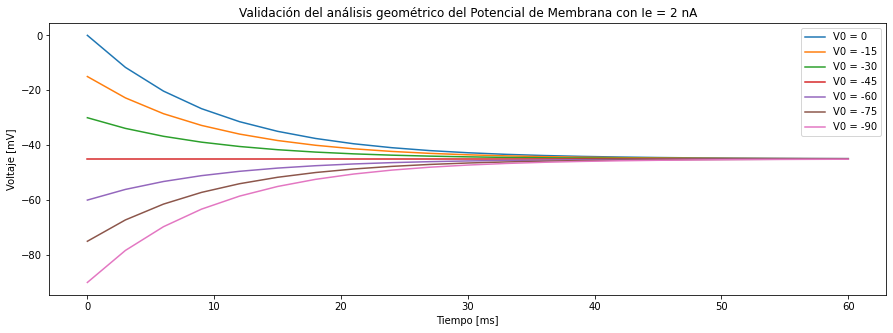

In [22]:
v0 = np.arange(0,-100,-15)
T = 10
E = -65
R = 10
I = 2

t_int2, v_int2 = integrador_ode(rk4, first_ode, v0, 0, 60, 20, (T, E, R, I))

#print(t_int1.shape)
#print(v_int1.shape)

plt.figure(figsize=(15,5))
plt.title("Validación del análisis geométrico del Potencial de Membrana con Ie = 2 nA")

for n in range(v_int1.shape[0]):
    plt.plot(t_int2, v_int2[n, :], label="V0 = "+ str(v0[n]))

plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.legend(loc="best")
plt.show()

Antes de continuar podemos comparar los gráficos obtenidos en (A) y (B) paralelamente. Se observa como la corriente constante en sentido contrario al potencial de reposo de base $E_{L}$ fuerza el sistema a un nuevo potencial de reposo alrededor de los -45 mV. Esto es coherente con el estudio analítico del sistema ya que, como mencionamos antes, el único punto fijo se encuentra en $ V_{m} = E_{L} + R_{m} I_{e}$ y reemplazando los valores de los parámetros y de la corriente para cada caso se obtienen -65 mV y -45 mV respectivamente para los casos de los puntos (A) y (B)

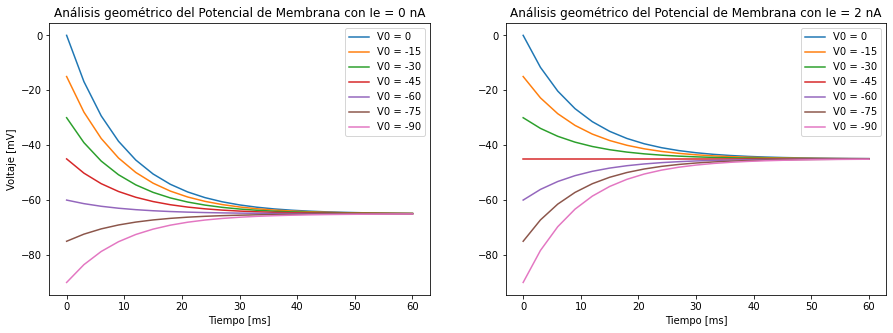

In [23]:
fig, axs = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

axs[0].set_title("Análisis geométrico del Potencial de Membrana con Ie = 0 nA")
axs[1].set_title("Análisis geométrico del Potencial de Membrana con Ie = 2 nA")

for n in range(v_int1.shape[0]):
    axs[0].plot(t_int1, v_int1[n, :], label="V0 = "+ str(v0[n]))
    axs[1].plot(t_int2, v_int2[n, :], label="V0 = "+ str(v0[n]))

axs[0].set_xlabel("Tiempo [ms]")
axs[0].set_ylabel("Voltaje [mV]")
axs[0].legend(loc="best")
axs[1].set_xlabel("Tiempo [ms]")
axs[1].legend(loc="best")
plt.show()

C) Si resolvemos la ecuación analíticamente, suponiendo que $I_{e}(t)$ y $V_{m}(t)$ son variables independientes:

$$ V_{m}(t) = E_{L} + R_{m} I_{e}(t) - (E_{L} - V_{m}(0) + R_{m} I_{e}(0))e^{-t/\tau} $$

Teniendo $I_{e}(t) = I$ constante, resulta:

$$ V_{m}(t) = E_{L} + R_{m} I - (E_{L} - V_{m}(0) + R_{m} I)e^{-t/\tau} $$

D) Graficamos la solución de este problema bajo los siguientes parámetros y condiciones:

$ 0 ms \leq t \geq 200 ms $

$ V_{m}(0) = E_{L} = -65 mV $

$ R_{m} = 10 M\Omega $

$ I = 2 nA $

$ \tau = 10 ms $

Se utilizará un muestreo de $h = 0.05 ms$ (para que concida con la consigna siguiente, para posterior comparación). Para ello se utilizan $N = 200 ms / 0.05 ms + 1 = 4001$ iteraciones.

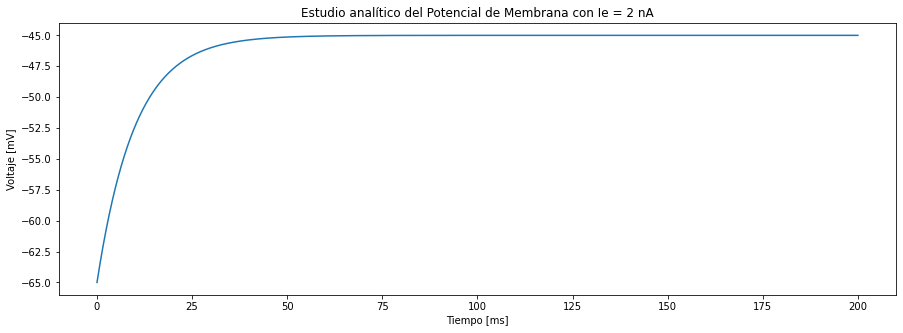

In [24]:
def first_ode_sol(t, v0, params):
    """
    params in order:
    -Tau
    -EL
    -Rm
    -Ie
    """
    return params[1] + params[2]*params[3] - (params[1] - v0 + params[2]*params[3]) * np.exp(-t / params[0])

t_ex = np.linspace(0, 200, 4001)
T = 10
E = -65
R = 10
I = 2
v0 = E

v_ex = first_ode_sol(t_ex, v0, (T, E, R, I)) 

plt.figure(figsize=(15,5))
plt.title("Estudio analítico del Potencial de Membrana con Ie = 2 nA")

plt.plot(t_ex, v_ex)

plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.show()

E) Aplicando el método Runge-Kutta de 4to Orden se validará el análisis realizado en el punto (D) mediante la resolución del problema del valor inicial, utilizando la fórmula de Taylor: (AGREGAR, poner "donde tal es RK4")

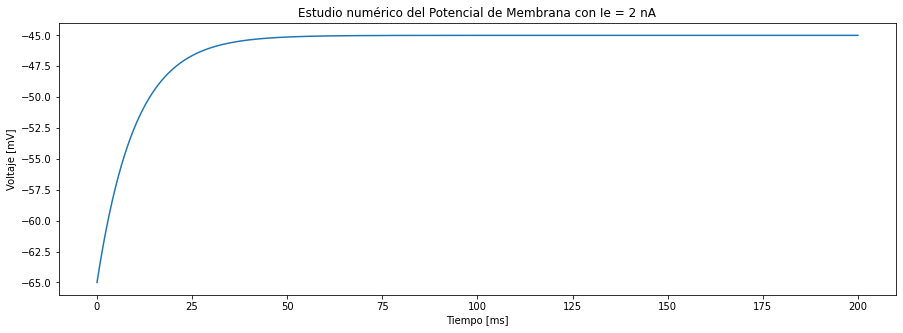

In [25]:
t_int3, v_int3 = integrador_ode(rk4, first_ode, [v0], 0, 200, 4001, (T, E, R, I))

plt.figure(figsize=(15,5))
plt.title("Estudio numérico del Potencial de Membrana con Ie = 2 nA")

plt.plot(t_int3, v_int3[0])

plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.show()

Para una mejor visualización, se proveen ambos gráficos a la par:

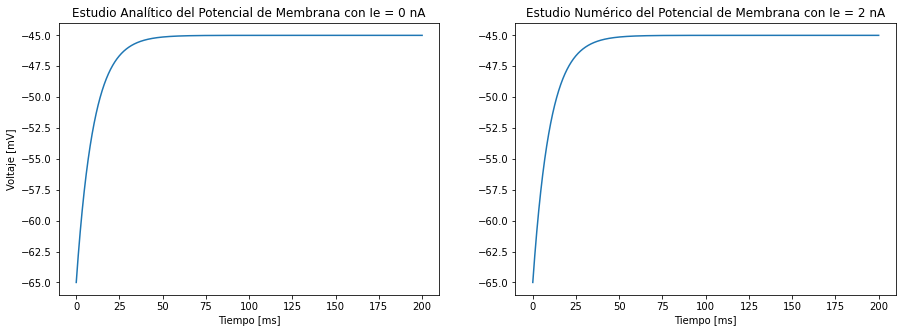

In [26]:
fig, axs = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

axs[0].set_title("Estudio Analítico del Potencial de Membrana con Ie = 0 nA")
axs[1].set_title("Estudio Numérico del Potencial de Membrana con Ie = 2 nA")

axs[0].plot(t_ex, v_ex)
axs[1].plot(t_int3, v_int3[0])

axs[0].set_xlabel("Tiempo [ms]")
axs[0].set_ylabel("Voltaje [mV]")
axs[1].set_xlabel("Tiempo [ms]")

plt.show()

F) Retomamos la ecuación estudiada hasta ahora, pero agregamos un umbral de reinicio $V_um$ que lleva al potencial $V_m(t)$ al potencial de reposo $E_L$ una vez que es superado. Todos los parámetros, tiempos de integración e inicializaciones conservan los mismos valores que para incisos anteriores, sólo se agrega este umbral en $V_um = -50 mV$. Se agregan en el gráfico dos líneas horizontales que representan el valor del potencial de reposo en $-65 mV$ y el valor de umbral en $-50 mV$. El comportamiento del sistema es similar al anterior en el sentido que se acerca al punto fijo estable en $ V_{m} = E_{L} + R_{m} I_{e}$ pero es interrumpido a mitad de camino al atravesar el umbral y retornado a el potencial de reposo, desde donde nuevamente se mueve hacia el punto fijo y continúa este ciclo periódicamente.

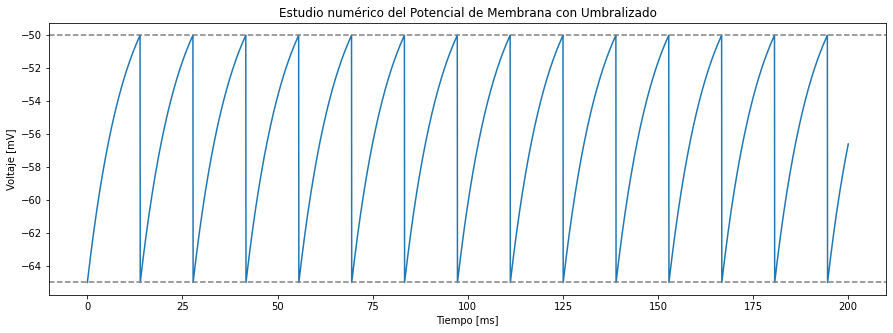

In [27]:
def integrador_ode_umbral(m,f,x0,a,b,k,p,u):
    #se agrega el parámetro u que representa el umbral
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        aux = m(f,x[:,j],t[j],dt,p)
        for i in range(x.shape[0]):
            if aux[i] >= u:
                x[i, j+1] = p[1]
            else:
                x[i, j+1] = aux[i]
    return t,x
    
t_int4, v_int4 = integrador_ode_umbral(rk4, first_ode, [v0], 0, 200, 4001, (T, E, R, I), u=-50)

plt.figure(figsize=(15,5))
plt.title("Estudio numérico del Potencial de Membrana con Umbralizado")

plt.plot(t_int4, v_int4[0])
plt.axhline(-50, color = "grey", linestyle = "--")
plt.axhline(-65, color = "grey", linestyle = "--")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.show()

Aprovechando que el integrador numérico admite inicializar el sistema en varios puntos en paralelo, como se aplicó en los incisos (A) y (B) se incluye una gráfica de el sistema inicializado en distintos potenciales. Se puede observar como, al disminuir el potencial de inicio, el sistema demora más en llegar a superar el umbral por primera vez, lo cual lo demora respecto de aquellos inicializados en potenciales menos negativos, y si bien el comportamiento luego se mantiene similar en todos, se mantiene un desfase constante entre ellos debido a esta primer demora.

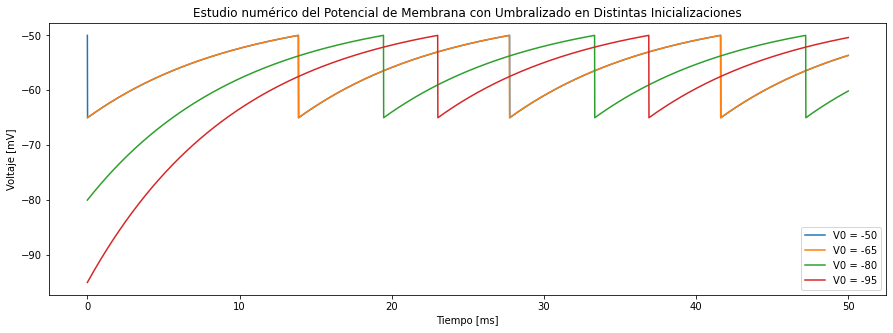

In [33]:
v0 = np.arange(-50,-100,-15)

t_int4bis, v_int4bis = integrador_ode_umbral(rk4, first_ode, v0, 0, 50, 4001, (T, E, R, I), u=-50)

plt.figure(figsize=(15,5))
plt.title("Estudio numérico del Potencial de Membrana con Umbralizado en Distintas Inicializaciones")

for n in range(v_int4bis.shape[0]):
    plt.plot(t_int4bis, v_int4bis[n, :], label="V0 = "+ str(v0[n]))

plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.legend(loc="best")
plt.show()

G) En este inciso se modifica el parámetro de corriente externa, que hasta este punto constaba de un valor constante, a una onda oscilatoria de la forma $I_e(t) = I_0 cos (t/30)$, tomando un valor de amplitud $I_0 = 2.5nA$. En los primeros casos de análisis observabamos como el sistema tendía a un punto fijo establecido por el aporte de los valores de $E_L, R_m, I_e$. Al incluir un umbral de reinicio, en los puntos consiguientes, esta tendencia se mantenía pero el sistema debía recorrer nuevamente el camino hacia el punto fijo cada vez que era reiniciado. En el presente análisis, ya que la corriente $I_e$ es variable, la posición del punto fijo varía también, lo cual conlleva a que el sistema en algunos casos no alcanze el umbral y respete la forma de la onda oscilatoria de $I_e$ a la que está siguiendo, incluso alejandose del umbral en algunas instancias. Cuando este comportamiento oscilatorio entra en terreno donde el potencial sí pueda superar al umbral, este repite la forma del inciso anterior, pero con una subida hasta el valor de umbral variable en cada pico del diente de sierra, debido a que, como mencionamos antes, la posición punto fijo es variable y atraerá al sistema hacia distintos valores más o menos alejados de ese umbral en cada momento. Se incluye entonces, para mayor claridad, la curva que sigue el punto fijo en cada instante, donde se puede observar como el sistema intenta seguir este comportamiento unos instantes más adelante.

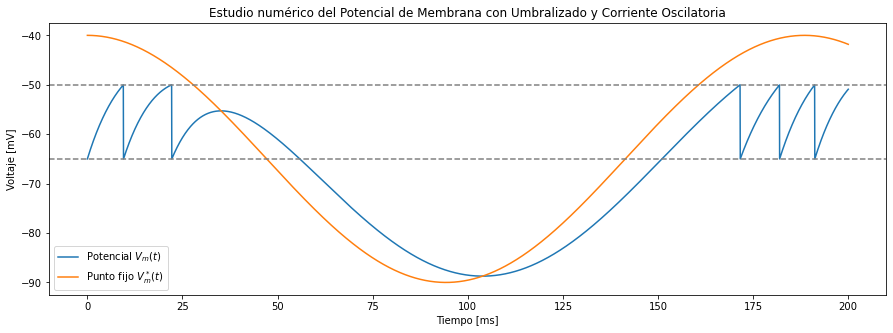

In [40]:
def second_ode(v, t, params):
    """
    params in order:
    -Tau
    -EL
    -Rm
    -Ie(t)
    """
    return (1/params[0]) * (params[1] - v + params[2]*params[3](t))

def ext_current(t):
    return 2.5*np.cos(t/30)

v0 = -65

t_int5, v_int5 = integrador_ode_umbral(rk4, second_ode, [v0], 0, 200, 4001, (T, E, R, ext_current), u=-50)

plt.figure(figsize=(15,5))
plt.title("Estudio numérico del Potencial de Membrana con Umbralizado y Corriente Oscilatoria")

plt.plot(t_int5, v_int5[0], label="Potencial $V_m(t)$")
plt.plot(t_int5, E+R*ext_current(t_int5), label="Punto fijo $V^*_m(t)$")
plt.axhline(-50, color = "grey", linestyle = "--")
plt.axhline(-65, color = "grey", linestyle = "--")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.legend()
plt.show()

H) Para calcular analíticamente la frecuencia de disparo utilizaremos la solución analítica de $V_m$

$$ V_{m}(t) = E_{L} + R_{m} I - (E_{L} - V_{m}(0) + R_{m} I)e^{-t/\tau} $$

En ella, analizaremos el tiempo de subida de uno de los picos del diente de sierra, ya que debido a que la bajada del umbral al potencial de reposo es virtualmente instantánea, este tiempo es igual al calculado entre pico y pico. Por lo tanto despejaremos el valor de t, reemplazaremos los valores de los parámetros planteados en el punto (F) y le daremos a $V_0$ el valor del potencial de reposo y a $V_m$ el valor de umbral.

$$ V_{m}(t) - (E_{L} + R_{m} I) = - (E_{L} - V_{m}(0) + R_{m} I)e^{-t/\tau} $$

$$ \frac{V_{m}(t) - (E_{L} + R_{m} I)}{- (E_{L} - V_{m}(0) + R_{m} I)} = e^{-t/\tau} $$

$$ \ln(\frac{V_{m}(t) - (E_{L} + R_{m} I)}{V_{m}(0) - (E_{L} + R_{m} I)}) = -t/\tau $$

$$ t = -\tau \ln(\frac{V_{m}(t) - (E_{L} + R_{m} I)}{V_{m}(0) - (E_{L} + R_{m} I)}) $$

(se podrían agregar algunas cancelaciones teniendo en cuenta que $E_L$ y %V_m(0)$ son iguales, pero se decide dejar esta forma más generalizada)
reemplazando los valores resulta en $t = 13.8629.. ms \simeq 13.86 ms$, lo cual equivaldría a una frecuencia de $f = 1000/t = 72.13475.. Hz \simeq 72.13 Hz$ (el 1000 en el numerador surge del pasaje de milisegundos a segundos para poder usar la unidad de Hertz en la frecuencia)



Para el cálculo numérico se grabará el valor del tiempo en cada reinicio, para luego tomar la diferencia entre dos de ellos. La diferencia entre los resultados puede surgir en que la suposición del cálculo analítico de que el reinicio se da de manera instantánea no es real.

In [46]:
def integrador_ode_frecuencia(m,f,x0,a,b,k,p,u):
    #se agrega el parámetro u que representa el umbral
    assert k>0
    restart_time_list = []
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        aux = m(f,x[:,j],t[j],dt,p)
        for i in range(x.shape[0]):
            if aux[i] >= u:
                x[i, j+1] = p[1]
                restart_time_list.append(t[j+1])
            else:
                x[i, j+1] = aux[i]
    return restart_time_list
    
restart_time_list = integrador_ode_frecuencia(rk4, first_ode, [v0], 0, 200, 4001, (T, E, R, I), u=-50)

print("Algunos valores de tiempo en el instante de reinicio medidos numéricamente:")
print(restart_time_list[:5])

print("\nDiferencia de tiempo entre reinicios:", restart_time_list[2] - restart_time_list[1], "ms")
#si bien en este caso el primer V0 es igual al valor de reinicio, en caso de que no fuese así, 
#se calcula con tiempos de reinicio separados de los primeros

print("\nFrecuencia de disparo:", 1000/(restart_time_list[2] - restart_time_list[1]), "Hz")

Algunos valores de tiempo en el instante de reinicio medidos numéricamente:
[13.896525868532887, 27.79305173706546, 41.68957760559865, 55.58610347413214, 69.48262934266485]

Diferencia de tiempo entre reinicios: 13.896525868533189

Frecuencia de disparo: 71.9604316546746


I) Por último, se integrará numéricamente el comportamiento del sistema si la corriente externa tiene la forma:

$$I_e(t)=0.35\left (cos \left(\frac{t}{3}\right) + sen\left(\frac{t}{5}\right) + cos\left(\frac{t}{7}\right) + sen\left(\frac{t}{11}\right) + cos\left(\frac{t}{13}\right) \right )^2 nA$$

Nuevamente se grafica tanto el potencial del sistema en el tiempo como el valor del punto fijo en el tiempo. Se observa como nuevamente el sistema intenta seguir al punto fijo, pero debido a que este varía mucho más, no llega a completar exactamente la forma de una de las ondas cuando ya debe cambiar la trayectoria, resultando en una onda mucho más atenuada que la del punto fijo. Por esta razón, no en todas las instancias que el punto fijo supera al umbral la señal lo alcanzará en un tiempo posterior, sino que el sobrepaso del primero debe ser lo suficientemente grande, sostenido y/o repetido para que el potencial del sistema llegue a superarlo al tender hacia él

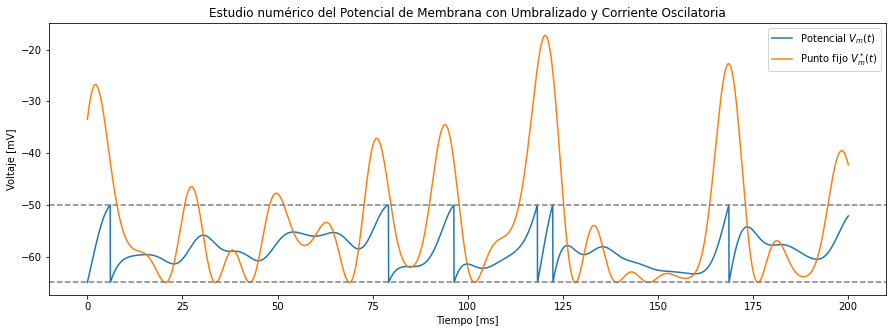

In [48]:
def ext_current(t):
    return 0.35*(np.cos(t/3) + np.sin(t/5) + np.cos(t/7) + np.sin(t/11) + np.cos(t/13))**2

v0 = -65

t_int6, v_int6 = integrador_ode_umbral(rk4, second_ode, [v0], 0, 200, 4001, (T, E, R, ext_current), u=-50)

plt.figure(figsize=(15,5))
plt.title("Estudio numérico del Potencial de Membrana con Umbralizado y Corriente Oscilatoria")

plt.plot(t_int6, v_int6[0], label="Potencial $V_m(t)$")
plt.plot(t_int6, E+R*ext_current(t_int6), label="Punto fijo $V^*_m(t)$")
plt.axhline(-50, color = "grey", linestyle = "--")
plt.axhline(-65, color = "grey", linestyle = "--")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [mV]")
plt.legend()
plt.show()